# Computer Vision, Fall 2023

#### Name: Mohammad Matin Parvanian

#### <font color='red'>Exercise 2, return latest on Sunday 24.9.2023 at 23.50 via Moodle</font>

Return the answer in PDF and Jupyter Notebook formats.


## Ex 2.1 Edge detection and image filtering. (3 points)

<img src="images/convolve.gif" width="500" align="center">

#### (a) Implement convolution function
   - Implement convolution function to filter images with the user-defined kernel.
   - Expect kernel sizes to be 3x3, 5x5, 7x7 or 9x9.
   - In this exercise, we use only 1-channel grayscale images.
   - Convolution function will be used in exercises 2.1b and 2.1c.
  

In [1]:
# Import Python packages needed in exercise 2.1
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
def convolution(img, kernel):
    """
    Args: 
       img: 1-channel grayscale image (NumPy array)
       kernel: kernel to use in convolution (NumPy array).
    
    Returns: 
        Convolved image (NumPy array)
    """
    
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    output = np.zeros_like(img)
    
    for i in range(pad_height, img_height - pad_height):
        for j in range(pad_width, img_width - pad_width):
            roi = img[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            conv_value = np.sum(roi * kernel)
            output[i, j] = conv_value
    return output


#### (b) Implement create_box_filter function and filter image

- Implement function to create different size box filters
- Read image "images/norway.jpeg" and convert it to grayscale
- Use your convolution function to filter the image with box filters
- Try different box filter sizes. How does the box size affect the result?

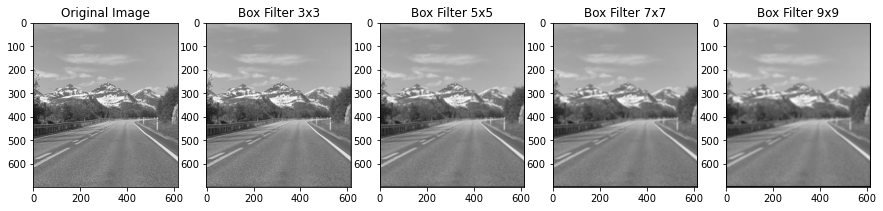

In [3]:
def create_box_filter(size):
    """
    Args: 
        size: Integer that defines size of the box filter.
    
    Returns: 
        Box filter with shape size x size (NumPy array).
    """
    if size <= 0:
        raise ValueError("Filter size must be a positive integer")
    
    return np.ones((size, size), dtype=np.float32) / (size * size)


img = cv2.imread('norway.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filter_sizes = [3, 5, 7, 9]

plt.figure(figsize=(15, 5))

plt.subplot(1, len(filter_sizes) + 1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

for i, size in enumerate(filter_sizes, start=2):
    box_filter = create_box_filter(size)
    filtered_img = convolution(img_gray, box_filter)

    plt.subplot(1, len(filter_sizes) + 1, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Box Filter {size}x{size}')

plt.show()



    How does the box size affect the result? 
The box filter replaces each pixel in the resulting image with the average value of its neighboring pixels in the input image. The size of the box filte determines the number of neighboring pixels that are considered when computing the average value.

As you can see the results above,a larger kernel size results in a more blurred image, as more neighboring pixels are included in the computation of each pixel’s value. Conversely, a smaller kernel size results in less blurring.

Moreover, a larger box size is more effective at reducing noise because it considers a broader area for averaging. A Smaller box sizes can reduce noise to some extent but may not be as effective as larger sizes

#### (c) Implement create_gaussian_filter function and filter image

- Implement function to create a gaussian filters
- Read image images/norway.jpeg and convert it to grayscale
- Use your convolution function to filter the image with the different gaussian filters
- How does the change of sigma value and kernel size affect the results? Try with different values.


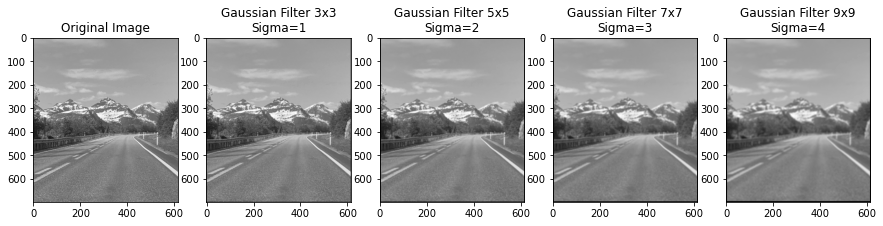

In [4]:
def create_gaussian_filter(size, sigma):
    """
    Args: 
        size: Integer that defines size of the gaussian filter.
        sigma: Standard deviation of Gaussian distribution
    
    Returns: 
        Gaussian filter with shape size x size and user-defined sigma
    """
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * np.exp(- ((x - (size-1)/2) ** 2 + (y - (size-1)/2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

img = cv2.imread('norway.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filter_sizes = [3, 5, 7, 9]
sigmas = [1, 2, 3, 4]

plt.figure(figsize=(15, 5))

plt.subplot(1, len(filter_sizes) + 1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

for i, (size, sigma) in enumerate(zip(filter_sizes, sigmas), start=2):
    gaussian_filter = create_gaussian_filter(size, sigma)
    filtered_img = convolution(img_gray, gaussian_filter)

    plt.subplot(1, len(filter_sizes) + 1, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Gaussian Filter {size}x{size}\nSigma={sigma}')

plt.show()


    How does the change of sigma value and kernel size affect the results?
The kernel size determines the spatial extent of the filter, while sigma controls the amount of smoothing applied to the image. A larger kernel size results in more smoothing, while a smaller kernel size results in less smoothing. Similarly, a larger sigma value results in more smoothing, while a smaller sigma value results in less smoothing.

In general, a larger kernel size and sigma value result in more blurring and less detail in the image. While, a smaller kernel size and sigma value result in less blurring.

#### (d) Edge detection

   - Search edges from the original image and from all filtered images using OpenCV Canny edge detector. Visualize results.
   - Which filter provides the best result? Why? Consider the best result to be one that could be used by the autonomous vehicle to stay in its lane (clear line markings and minimal amount of image noise).

Hint:
 - [OpenCV Canny Edge Detection](https://docs.opencv.org/5.x/da/d22/tutorial_py_canny.html)

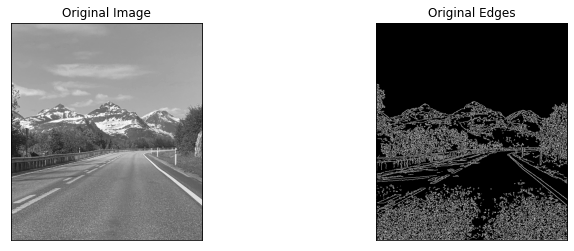

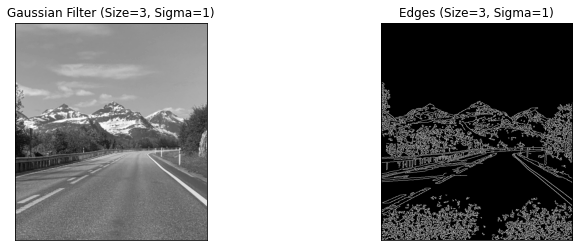

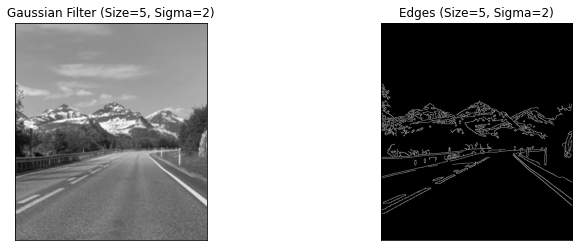

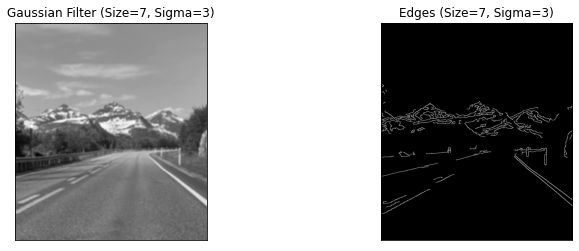

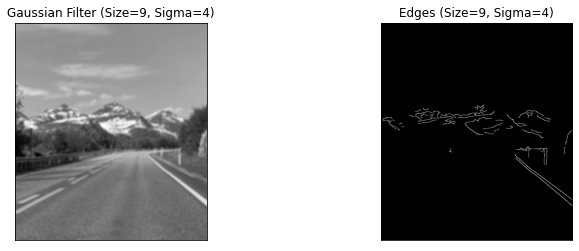

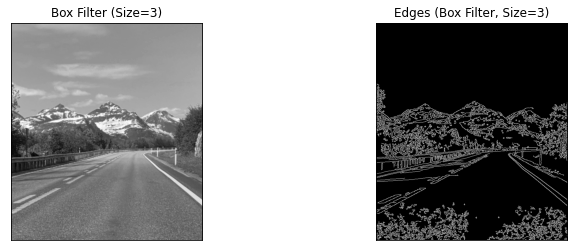

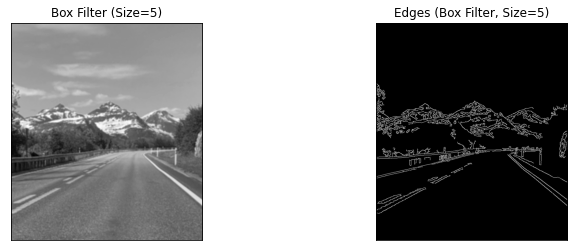

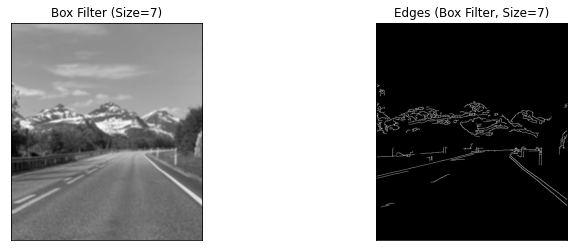

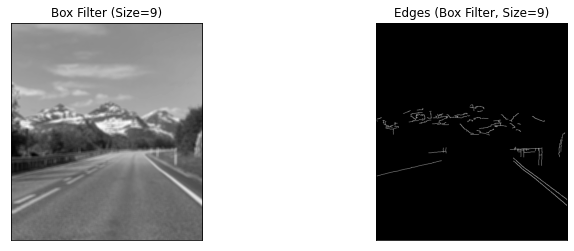

In [5]:
# Answer here
original_image = cv2.imread('norway.jpg', cv2.IMREAD_GRAYSCALE)


gaussian_filter_sizes = [3, 5 , 7, 9]  
gaussian_sigmas = [1, 2, 3, 4]         


box_filter_sizes = [3, 5, 7, 9]  

# Apply Canny edge detection to the original image
original_edges = cv2.Canny(original_image, threshold1=100, threshold2=200)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(original_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(original_edges, cmap='gray')
plt.title('Original Edges'), plt.xticks([]), plt.yticks([])
plt.show()


for size, sigma in zip(gaussian_filter_sizes, gaussian_sigmas):
    gaussian_filter = cv2.getGaussianKernel(size, sigma)
    gaussian_filter = np.outer(gaussian_filter, gaussian_filter)

    filtered_image = cv2.filter2D(original_image, -1, gaussian_filter)

    filtered_edge = cv2.Canny(filtered_image, threshold1=50, threshold2=150)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1), plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Gaussian Filter (Size={size}, Sigma={sigma})'), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2), plt.imshow(filtered_edge, cmap='gray')
    plt.title(f'Edges (Size={size}, Sigma={sigma})'), plt.xticks([]), plt.yticks([])
    plt.show()

for size in box_filter_sizes:
    box_filter = np.ones((size, size), np.float32) / (size * size)
    
    filtered_image = cv2.filter2D(original_image, -1, box_filter)

    filtered_edge = cv2.Canny(filtered_image, threshold1=50, threshold2=150)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1), plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Box Filter (Size={size})'), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2), plt.imshow(filtered_edge, cmap='gray')
    plt.title(f'Edges (Box Filter, Size={size})'), plt.xticks([]), plt.yticks([])

    plt.show()


    Which filter provides the best result? Why?
As it is mentioned in the question, the ideal filter should enhance lane markings while minimizing image noise. First, the Canny edge detection on the original image captures the edges, including lane markings, effectively. However, some noise is presented on the edges. 

Second, the Gaussian filters with different sizes and sigmas provide varying degrees of smoothing. Smaller sigmas and kernel sizes preserve more fine details but couldn't reduce noises significantly. Larger sigmas and kernel sizes provide better noise reduction but blur lane markings. 

Third, box filters are less effective at noise reduction compared to Gaussian filters. Smaller box filter sizes preserve more detail but couldn't reduce noise significantly. Also, Larger box filter sizes provide some noise reduction but not as effective as Gaussian filters.

So as you can see the Gaussian filter with size and sigma of 5 is the best choice based on the criteria of clear lane markings and minimal image noise.

## Ex 2.2 Detect and match features (3 p)

#### (a) Detect and visualize SIFT features

 - Read images "images/GOPR1515_03850" and "images/GOPR1515_03852" and convert them to grayscale
 - Run OpenCV SIFT feature detection
 - Visualize found SIFT keypoints from both images

Hints:

 -  We provide you a function visualize_features which can be used to visualize your results.
 - Depending on your OpenCV version, you may need to install OpenCV contrib package: [Link to opencv-contrib-python](https://pypi.org/project/opencv-contrib-python/)
 - OpenCV material that may be useful: 
    - [OpenCV cv::KeyPoint Class Reference](https://docs.opencv.org/5.x/d2/d29/classcv_1_1KeyPoint.html)
    - [OpenCV cv::Feature2D Class Reference](https://docs.opencv.org/5.x/d0/d13/classcv_1_1Feature2D.html)
    - [Introduction to SIFT (Scale-Invariant Feature Transform in OpenCV)](https://docs.opencv.org/5.x/da/df5/tutorial_py_sift_intro.html)

In [6]:
def visualize_features(image, kp):
    """
    Visualize extracted features in the image

    Arguments:
       image: a grayscale image
       kp: list of the extracted keypoints

    Returns:
    """  
    display = cv2.drawKeypoints(image, kp, None, color=(0,255,0), flags=0)
    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(display)
    

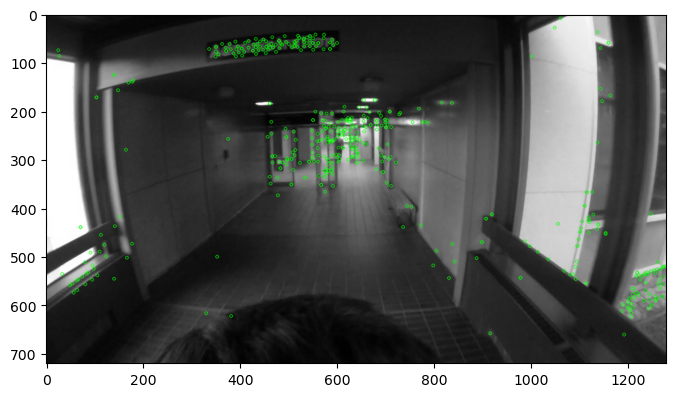

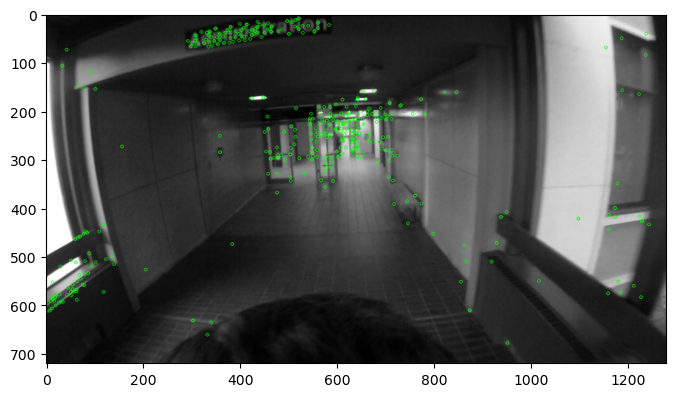

In [7]:
# Answer here
img01 = cv2.imread('GOPR1515_03850.jpg', cv2.IMREAD_GRAYSCALE)
img02 = cv2.imread('GOPR1515_03852.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints01, des1 = sift.detectAndCompute(img01, None)
keypoints02, des2 = sift.detectAndCompute(img02, None)

visualize_features(img01, keypoints01)
visualize_features(img02, keypoints02)

#### (b) Feature matching

 - Implement feature matching algorithm (you can use OpenCV matching algorithm only to verify your results).
 - How good is the result? How could you improve it?

Hint:
   - We provide you a function visualize_matches which can be used to visualize your results.
   - [OpenCV Feature Matching tutorial. Do not use ready made matching algorithm in this exercise!](https://docs.opencv.org/5.x/dc/dc3/tutorial_py_matcher.html)

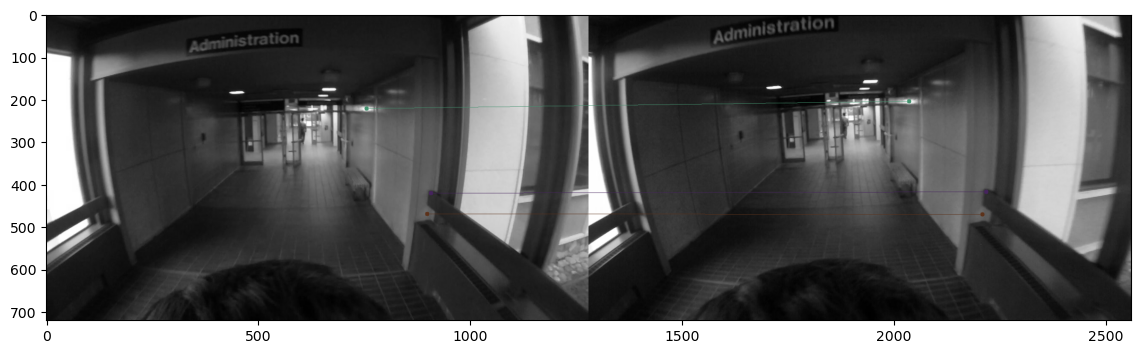

In [8]:
import random

def visualize_matches(image01, kp01, image02, kp02, matches):
    """
    Visualize corresponding matches in two images

    Arguments:
        image1: the first image in a matched image pair
        kp1: list of the keypoints in the first image
        image2: the second image in a matched image pair
        kp2: list of the keypoints in the second image
        matches: list of keypoint index pairs of matched features. Example format: [(0,2), (1,4), (5,10)].

    Returns:
    """
    # Get width of the first image
    _ , width = image01.shape
    
    # Concatenate images
    img = cv2.hconcat([image01, image02])
    
    # Convert image from gray to RGB
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Add matches to image
    for match in matches:
        
        # Get random color
        r = random.randint(0,255)
        g = random.randint(0,255)
        b = random.randint(0,255)
        color = (r,g,b)
        
        # Get coordinates
        point_img01 = kp01[match[0]].pt
        point_img02 = kp02[match[1]].pt
        
        # Get x and y values from coordinates
        x_img01 = int(point_img01[0])
        y_img01 = int(point_img01[1])
        x_img02 = int(point_img02[0]) + width
        y_img02 = int(point_img02[1]) 
        
        # Draw small circle to matched keypoints
        cv2.circle(img, (x_img01, y_img01), radius=5, color=color, thickness=-1)
        cv2.circle(img, (x_img02, y_img02), radius=5, color=color, thickness=-1)
        
        # Draw line between matches
        cv2.line(img, (x_img01, y_img01), (x_img02, y_img02), color, thickness=1)
    
    # Show image with matches
    plt.figure(figsize=(14, 14), dpi=100)
    plt.imshow(img)
    
# Dummy matches to test visualize_matches function.
# You can try it after you have read images and extracted keypoints in exercise 2.2a.
matches = [(382, 422), (384, 424), (368, 407)]
visualize_matches(img01, keypoints01, img02, keypoints02, matches)

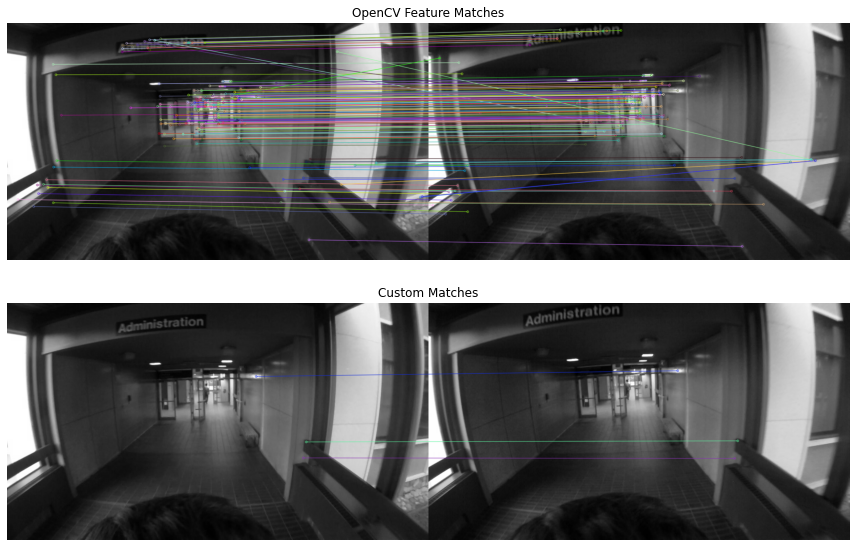

In [9]:
# Answer here

# Description: In this section I used Brute-Force Matching with SIFT Descriptors and ratio test
# I used BFMatcher.knnMatch() to get k best matches. I considered k=2 sin order to apply ratio test. 
# The reason to get the k best matches before applying the ratio test is to obtain more reliable matches and 
# improve the overall quality of the feature matching process.

bf = cv2.BFMatcher()

# Match descriptors between the two images
matches_cv2 = bf.knnMatch(des1, des2, k=2)  

# Apply ratio test to filter good matches
good_matches_cv2 = []
for m, n in matches_cv2:
    if m.distance < 0.75 * n.distance:
        good_matches_cv2.append(m)

# Visualize OpenCV's feature matches
match_img_cv2 = cv2.drawMatches(img01, keypoints01, img02, keypoints02, good_matches_cv2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Define custom matches
custom_matches = [(382, 422), (384, 424), (368, 407)]

# Convert the custom matches to DMatch objects
custom_matches_cv2 = [cv2.DMatch(_queryIdx=idx1, _trainIdx=idx2, _distance=0) for idx1, idx2 in custom_matches]

# Create dummy imgIdx values for the DMatch objects
imgIdx = [0] * len(custom_matches_cv2)
for i, match in enumerate(custom_matches_cv2):
    match.imgIdx = imgIdx[i]

# Draw  custom matches
match_img_custom = cv2.drawMatches(img01, keypoints01, img02, keypoints02, custom_matches_cv2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display both sets of matches 
plt.figure(figsize=(12, 8))  
plt.subplot(211) 
plt.imshow(cv2.cvtColor(match_img_cv2, cv2.COLOR_BGR2RGB))
plt.title("OpenCV Feature Matches")
plt.axis('off')

plt.subplot(212)  
plt.imshow(cv2.cvtColor(match_img_custom, cv2.COLOR_BGR2RGB))
plt.title("Custom Matches")
plt.axis('off')

plt.tight_layout() 
plt.show()


## Exercise 2.3: Fourier Transform (2 points)

**Helpful resources:**

- You may utilize either OpenCV or NumPy for FFT and image rotation operations.
- Refer to this link for a detailed OpenCV Fourier Transform tutorial: [OpenCV Fourier Transform Tutorial](https://docs.opencv.org/5.x/de/dbc/tutorial_py_fourier_transform.html)

### Task (a): Evaluating Image Orientation in Signal Space

1. Load the image 'images/son3.png'.
2. Create three copies of the image: one in the original orientation, one rotated by 30 degrees, another by 60 degrees, and the last one by 90 degrees.
3. Perform the Fast Fourier Transform (FFT) followed by an FFT shift on all four images. Then visualize their magnitude spectrums.
4. Observe and describe the orientation of the text in the magnitude images.
5. Explain what causes the appearance of horizontal and vertical lines in the FFT magnitude spectrum.

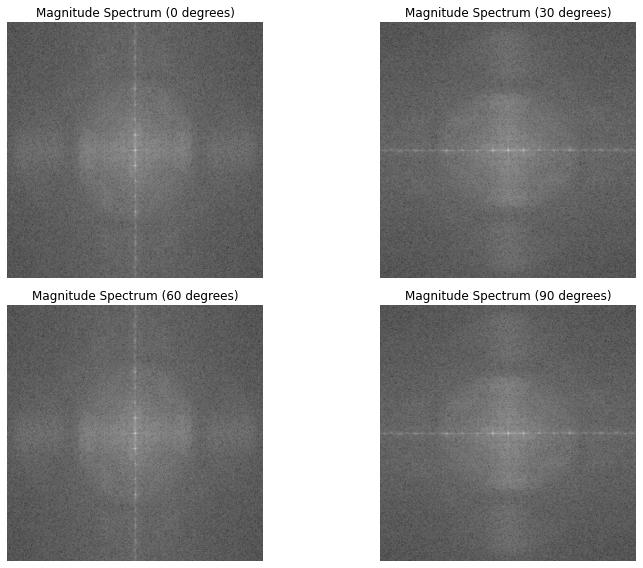

In [10]:
# Answer here
image = cv2.imread('son3.png', cv2.IMREAD_GRAYSCALE)

# Create rotated copies of the image
rotated_0 = image.copy()
rotated_30 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
rotated_60 = cv2.rotate(rotated_30, cv2.ROTATE_90_CLOCKWISE)
rotated_90 = cv2.rotate(rotated_60, cv2.ROTATE_90_CLOCKWISE)

# Perform FFT and FFT shift on all images
fft_0 = np.fft.fftshift(np.fft.fft2(rotated_0))
fft_30 = np.fft.fftshift(np.fft.fft2(rotated_30))
fft_60 = np.fft.fftshift(np.fft.fft2(rotated_60))
fft_90 = np.fft.fftshift(np.fft.fft2(rotated_90))

# Calculate magnitude spectra
magnitude_0 = np.abs(fft_0)
magnitude_30 = np.abs(fft_30)
magnitude_60 = np.abs(fft_60)
magnitude_90 = np.abs(fft_90)

# Visualize the magnitude spectra
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(np.log(magnitude_0), cmap='gray')
plt.title('Magnitude Spectrum (0 degrees)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log(magnitude_30), cmap='gray')
plt.title('Magnitude Spectrum (30 degrees)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log(magnitude_60), cmap='gray')
plt.title('Magnitude Spectrum (60 degrees)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.log(magnitude_90), cmap='gray')
plt.title('Magnitude Spectrum (90 degrees)')
plt.axis('off')

plt.tight_layout()
plt.show()


    Answer:
Observing the magnitude spectra of the rotated images can reveal information about the orientation of the text and help explain the appearance of horizontal and vertical lines in the FFT magnitude spectrum. For example in the original orientation with 0 degree the magnitude spectra of the rotated images can reveal information about the orientation of the text and help explain the appearance of horizontal and vertical lines in the FFT magnitude spectrum. In 30 degree we can see the dominant lines or streaks have shifted to a 30-degree angle relative to the horizontal axis.Moreover,the appearance of horizontal and vertical lines in the FFT magnitude spectrum is caused by the fact that FFT analyzes the frequency components in an image. Horizontal lines in the magnitude spectrum represent dominant frequency components that are oriented horizontally in the image. Vertical lines in the magnitude spectrum represent dominant frequency components oriented vertically in the image.

#### b) Implementing High Pass Filter and Low Pass Filter

- Open the image 'images/lenna.png' and convert it into grayscale.
- Conduct a Fast Fourier Transform (FFT) on this image.
- Next, create two copies of the Fourier magnitude spectrum. For one copy, apply a low pass filter (LPF) and for the other, apply a high pass filter (HPF). In both cases, utilize a circular mask with a 30-pixel radius for the filtering process.
- Perform an inverse Fourier transform on the spectra that have been filtered.
- Finally, observe and discuss the impact that the LPF and HPF have had on the image.

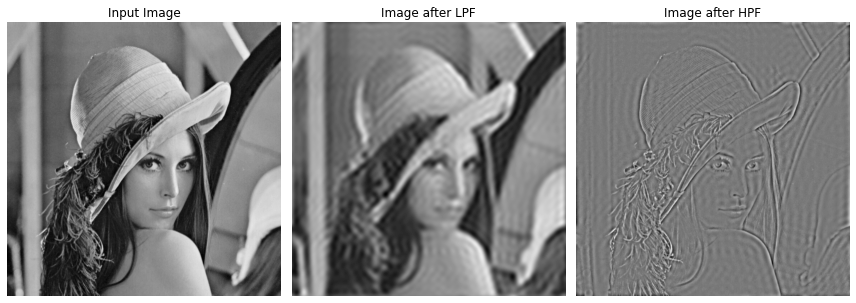

In [11]:
# Answer here

img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

# Perform Fast Fourier Transform (FFT)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Create circular masks for LPF and HPF
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
radius = 30  # Adjust the radius as needed

# Create LPF mask
mask_lpf = np.ones((rows, cols), dtype=np.uint8)
mask_lpf[crow - radius:crow + radius + 1, ccol - radius:ccol + radius + 1] = 0

# Create HPF mask (complementary to LPF)
mask_hpf = 1 - mask_lpf

# Apply LPF and HPF to the magnitude spectrum
fshift_lpf = fshift * mask_lpf
fshift_hpf = fshift * mask_hpf

# Perform inverse Fourier transform to get filtered images
f_ishift_lpf = np.fft.ifftshift(fshift_lpf)
img_back_lpf = np.fft.ifft2(f_ishift_lpf)
img_back_lpf = np.real(img_back_lpf)

f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_back_hpf = np.fft.ifft2(f_ishift_hpf)
img_back_hpf = np.real(img_back_hpf)

# Display the original image and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_back_hpf, cmap='gray')
plt.title('Image after LPF') 
plt.axis('off')

plt.subplot(133)
plt.imshow(img_back_lpf, cmap='gray')
plt.title('Image after HPF') 
plt.axis('off')

plt.tight_layout()
plt.show()


    Observe and discuss the impact that the LPF and HPF have had on the image.
As you can see above, the LPF has reduced high-frequency components in the image and preserved low-frequency components so, the image appears smoother and less detailed compared to the original image. Moreover, details, high-frequency noise, and sharp edges are suppressed, leading to a  blurred image. The Lenna LPF image appears smoother and less detailed. Fine textures on the skin, hair, and clothing are reduced, resulting in a softer appearance

Besides, the HPF has increased high-frequency components in the last image and preserved low-frequency components. So, the image exhibits more pronounced edges and fine details compared to the original image. Edges and features in the image become sharper and stand out more prominently. In the Lenna HPF image, it has accentuated the edges of features such as the face, hat, shoulders, and hair. These edges appear sharper and more defined.